# Encoding Model (GLMs) for population activity as a function of sensory and behavioral variables

In [42]:
# importing modules and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io_utils import *
from plotting_utils import *
from analysis_utils import * 
from pathlib import Path
import pickle
import scipy
import seaborn as sns
sns.set_context("talk")
colormap = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']


In [43]:
animals = ['29L','3095','3096','3097','30B','30L','30R2','4013','4014','4015','4016','91R2'] # list of all aniamls
days = ['d1_balbc','d2_balbc','d3_balbc','d4_balbc','d5_balbc','d6_balbc','d7_balbc','d8_balbc','d9_mCD1'] # list of all days
daysObs = ['d1_obs','d2_obs','d3_obs','d4_obsc','d5_obs','d6_obs','d7_obs','d8_obs','d9_obs'] # list of all days for observer group
animalsObs = ['29L','30R2'] # list of observer animals
sessions = ['t1','t2','t3'] # session in each day

In [44]:
# with open('../data/29L_d1_balbc_t1_zscored_features.pickle', 'rb') as handle: # from cup folder 020924
#     dict = pickle.load(handle)
# df = pd.DataFrame(dict)
# df.head()
z = pd.read_parquet('../data/29L/29L_d1_balbc_t1_zscored_features.parquet')
z.head()

# CHECK WITH JORGE THAT FPS=40

resident tti2head  resident tti2trunk  resident tti2neck  \
0          -0.772152           -0.655448          -1.130393   
1          -0.766932           -0.649833          -1.124174   
2          -0.756546           -0.638667          -1.111799   
3          -0.741099           -0.622070          -1.093393   
4          -0.720747           -0.600227          -1.069145   

   resident tti2centroid  resident head2nose  resident trunk2head  \
0              -0.097189            1.360581            -1.378523   
1              -0.093004            1.358083            -1.372003   
2              -0.084690            1.353078            -1.359033   
3              -0.072356            1.345553            -1.339750   
4              -0.056167            1.335495            -1.314358   

   resident forepaw left2head  resident forepaw right2head  \
0                   -0.989778                     2.040595   
1                   -0.984754                     2.041990   
2                   -0.974688                     2.044690   
3                   -0.959545                     2.048513   
4                   -0.939283                     2.053199   

   resident forepaw left2trunk  resident forepaw right2trunk  ...  \
0                     0.167322                      1.853846  ...   
1                     0.156222                      1.844537  ...   
2                     0.134239                      1.826001  ...   
3                     0.101796                      1.798395  ...   
4                     0.059511                      1.761960  ...   

   resident2intruder nose-centroid mean across lags  \
0                                          0.256217   
1                                          0.257808   
2                                          0.260978   
3                                          0.265694   
4                                          0.271914   

   resident2intruder nose-centroid median across lags  \
0                                           0.997051    
1                                           1.002044    
2                                           1.011921    
3                                           1.026467    
4                                           1.045369    

   resident2intruder nose-centroid sum across lags  \
0                                         0.256217   
1                                         0.257808   
2                                         0.260978   
3                                         0.265694   
4                                         0.271914   

   intruder2resident nose-centroid mean across lags  \
0                                         -0.384007   
1                                         -0.382684   
2                                         -0.380049   
3                                         -0.376129   
4                                         -0.370960   

   intruder2resident nose-centroid median across lags  \
0                                           0.164879    
1                                           0.168854    
2                                           0.176720    
3                                           0.188308    
4                                           0.203375    

   intruder2resident nose-centroid sum across lags  \
0                                        -0.384007   
1                                        -0.382684   
2                                        -0.380049   
3                                        -0.376129   
4                                        -0.370960   

   intruder2resident nose-tti mean across lags  \
0                                    -1.012908   
1                                    -1.011720   
2                                    -1.009355   
3                                    -1.005837   
4                                    -1.001197   

   intruder2resident nose-tti median across lags  \
0                                      -0.549364   
1                 

In [45]:
animal = '29L'
df = load_and_wrangle(mouseId=animal, path=None, overwrite=False) # load csv for animal

In [46]:
featuresShortlist = ["proximity","resident centroid roc 500 ms", "intruder centroid roc 500 ms",'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle"]
circularShortlist = [0, 0, 0, 0, 0, 1, 1, 1]
featuresLonglist = ["proximity",'resident2intruder head-head', 'resident2intruder head-tti','resident2intruder head2head angle', 'resident2intruder head2tti angle', "intruder2resident head2centroid angle","resident centroid roc 500 ms", "intruder centroid roc 500 ms",
   "resident tti2head", "intruder tti2head", "resident tailbase2head angle", "intruder tailbase2head angle"] # potentially add more

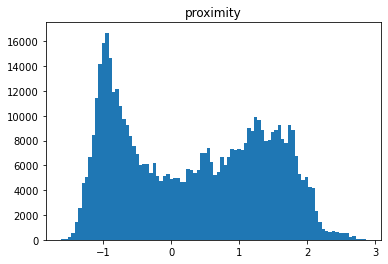

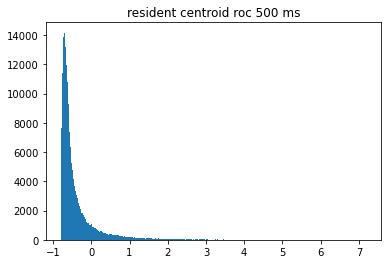

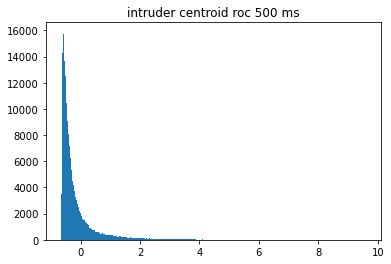

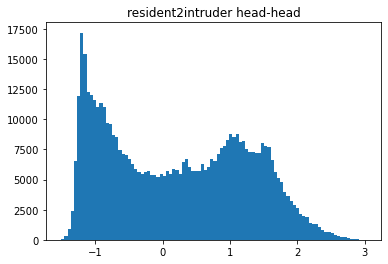

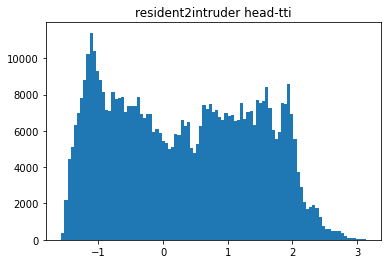

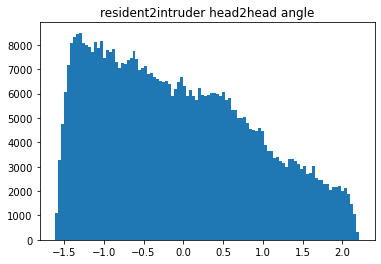

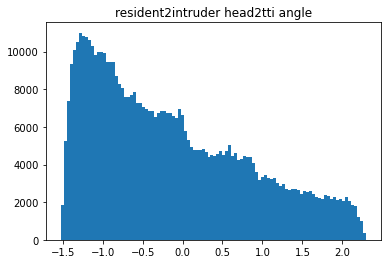

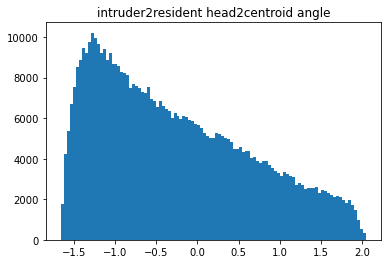

In [ ]:
histogram_feature(animal, features=featuresShortlist, path=None)

In [6]:
regions = get_regions_dataframe(df) # get recorded regions from dataframe
print(regions)

['PrL (E)', 'PrL (I)', 'vLS (E)', 'vLS (I)', 'POA (E)', 'POA (I)', 'BNST (E)', 'BNST (I)', 'AH (E)', 'AH (I)', 'MeA (E)', 'MeA (I)', 'VMH (E)', 'VMH (I)', 'PAG (E)', 'PMv (E)', 'PMv (I)', 'LHb (E)', 'LHb (I)', 'PA (E)', 'PA (I)', 'NAc (DA)']


In [47]:
X_all, X, bin_centers = get_design_X_GLM_features(animal, features=[featuresShortlist[1]], Nbins=5)

In [48]:
region = 'POA (I)'
Y_all, Y = get_output_Y_GLM(animal, region, path=None)


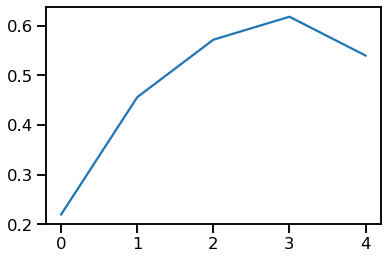

0.30660067339253716


In [49]:
w_hat = solution_linear_Gaussian_smoothing(X_all, Y_all, feature_start=[0, 1], circular=[0,0], alpha=10) # bias + one tuning curve
plt.plot(w_hat[1:])
plt.show()

print(mse(X_all, Y_all, w_hat))

In [10]:
featuresInterest_index = [0,1,5]#[0,1,2,3,5] # out of all  indices in feature Shortlist

In [11]:
animal = '29L'
region = 'POA (I)'
alpha_values = [0.1,100,10000] #[10**x for x in range(-3,7)] 
Nbin_values = [8] #[2**x for x in range(3,7)]
W_map, train_mse, test_mse = fit_KFold_linear_Gaussian_smoothing(animal, [featuresShortlist[0]], [circularShortlist[0]], region, Nbin_values, alpha_values, K=K, blocks=400, path=None)
# fit_CV_linear_Gaussian_smoothing(animal=animal, features=[featuresShortlist[ind]], region=region, Nbin_values=Nbin_values, alpha_values=alpha_values, path=data_path) 

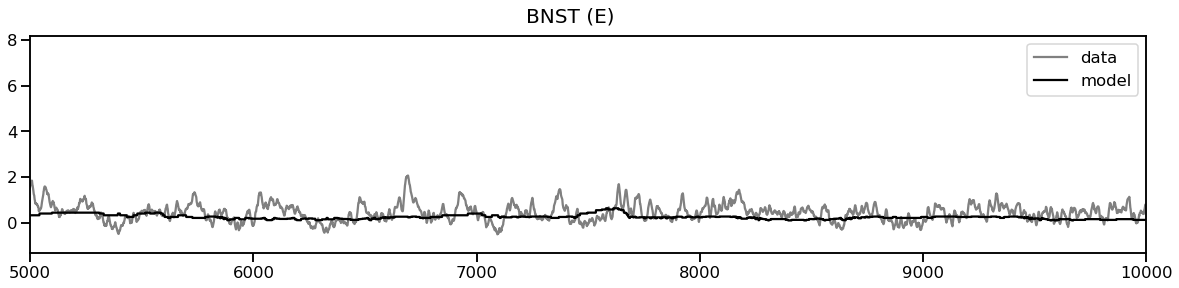

In [52]:
# loading cluster fits
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-4,5)] 
Nbin_values = [2**x for x in range(3,9)]
Nbin_index = 3

for region in ['BNST (E)']:#regions:
    fits = np.load(f'../data/{animal}/{animal}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']

    
    for ind in [0]: # range(len(featuresShortlist)):

        X_all, _, _ = get_design_X_GLM_features(animal, features=[featuresShortlist[ind]], Nbins=Nbin_values[Nbin_index], path=None)
        Y_all, _ = get_output_Y_GLM(animal, region, path=None)

        best_ind = np.argmin(test_mse[ind, Nbin_index, :])

        fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
        axes.plot(Y_all, color='gray', label='data')
        axes.plot(X_all @ W_map[ind, Nbin_index, best_ind], color='black', label='model') 
        axes.set_xlim(5000,10000)
        axes.legend()
        # axes[ind].set_title('test mse is ' + str(np.round(test_mse[ind, Nbin_index, best_ind], 3)))

        fig.suptitle(str(region), size=20)
        plt.show()

In [ ]:
# Checking if linear nonlinearity works well

/var/folders/w4/p225s7cd19n0j6tss7pdl21w0000gn/T/ipykernel_72336/2263086337.py:30: RuntimeWarning: invalid value encountered in double_scalars
  y_avg[bin] = Y_all[ind_bin].sum()/len(ind_bin)
/Users/lencacuturela/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


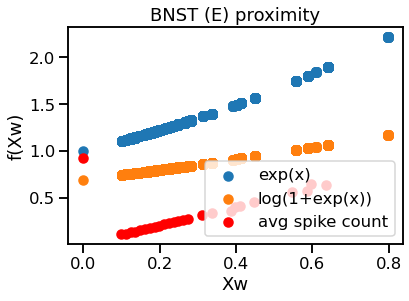

In [53]:
# loading cluster fits
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-4,5)] 
Nbin_values = [2**x for x in range(3,9)]

region = 'BNST (E)'

fits = np.load(f'../data/{animal}/{animal}_MAP-estimation_region={region}.npz', allow_pickle=True)
W_map = fits['W_map']
train_mse = fits['train_mse']
test_mse = fits['test_mse']

index = 0 # index of feature (instead of for loop over all)

best_ind = np.unravel_index(np.argmin(test_mse[ind, :, :]), test_mse[ind, :, :].shape) # finding best index across bin number and alphas
X_all, X, bin_centers = get_design_X_GLM_features(animal, [featuresShortlist[ind]], Nbin_values[best_ind[0]])
Y_all, Y = get_output_Y_GLM(animal, region)
w_MLE = W_map[ind, best_ind[0], best_ind[1]]
    
N = Nbin_values[best_ind[0]]
h = np.histogram(X_all @ w_MLE, bins=N)
y_avg = np.zeros((N))
for bin in range(0,N):
  ind_higher = np.argwhere(X_all @ w_MLE >= h[1][bin]).flatten()
  ind_lower = np.argwhere(X_all @ w_MLE < h[1][bin+1]).flatten()
  ind_bin = list(set(ind_lower).intersection(set(ind_higher)))
  y_avg[bin] = Y_all[ind_bin].sum()/len(ind_bin)
plt.scatter(X_all @ w_MLE, np.exp(X_all @ w_MLE), label='exp(x)')
plt.scatter(X_all @ w_MLE, np.log(1+np.exp(X_all @ w_MLE)), label='log(1+exp(x))')
plt.scatter(h[1][:-1], y_avg, color='red', label='avg spike count')
plt.xlabel('Xw')
plt.ylabel('f(Xw)')
plt.legend()
plt.title(region + " " + featuresShortlist[index])
plt.show()

In [ ]:
# MSE among cluster fits for particular animal
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-3,7)] 
Nbin_values = [2**x for x in range(3,7)]
K = 5

for region in regions:
    fits = np.load(f'../data/{animal}/{animal}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']


    fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(35,5))
    axes[0].set_ylabel('MSE')

    for feature_ind in range(len(featuresInterest_index)): #range(len(featuresShortlist)):

        for Nbin_ind in range(len(Nbin_values)):
            best_ind = np.argmin(np.mean(test_mse[featuresInterest_index[feature_ind], Nbin_ind, :],axis=0))

            axes[feature_ind].scatter(np.log10(alpha_values[best_ind]), np.mean(test_mse[featuresInterest_index[feature_ind], Nbin_ind, :],axis=0)[best_ind], color=colormap[Nbin_ind])
            axes[feature_ind].plot(np.log10(alpha_values), np.mean(test_mse[featuresInterest_index[feature_ind], Nbin_ind, :],axis=0), label=f'test Nbin={Nbin_values[Nbin_ind]}', color=colormap[Nbin_ind])
            # axes[feature_ind].plot(np.log10(alpha_values), train_mse[featuresInterest_index[feature_ind], Nbin_ind, :],  linestyle='dashed')
            axes[feature_ind].set_xlabel('log 10 alpha value')
            axes[feature_ind].legend()
            axes[feature_ind].set_title(featuresShortlist[featuresInterest_index[feature_ind]]) 

    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()

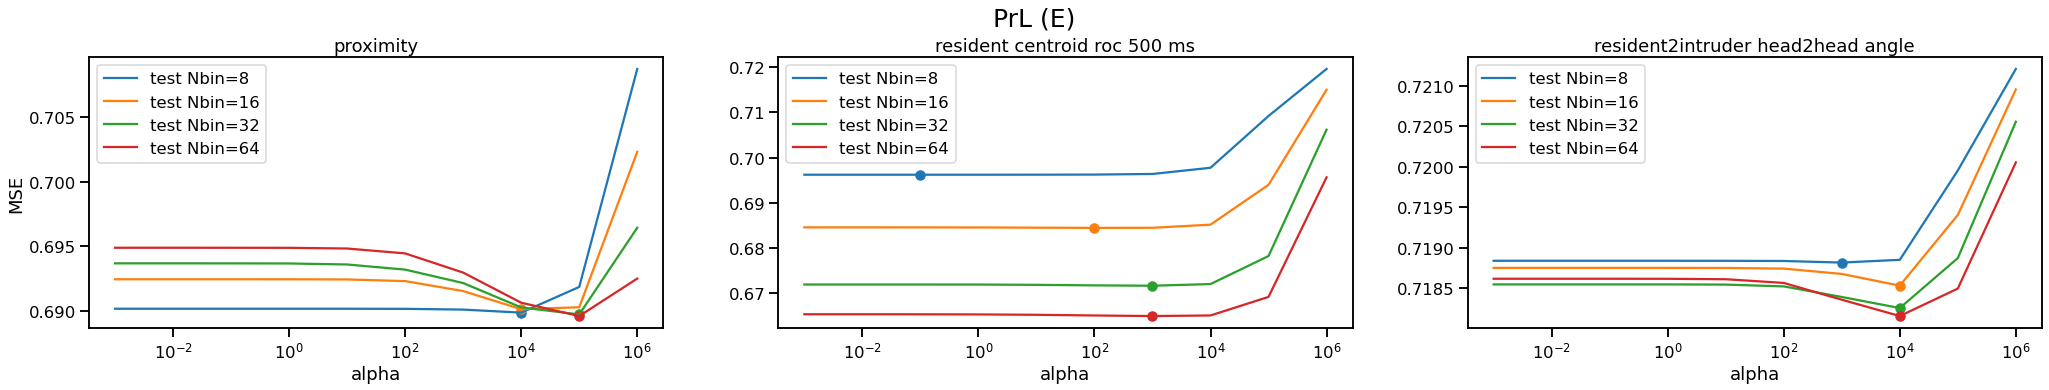

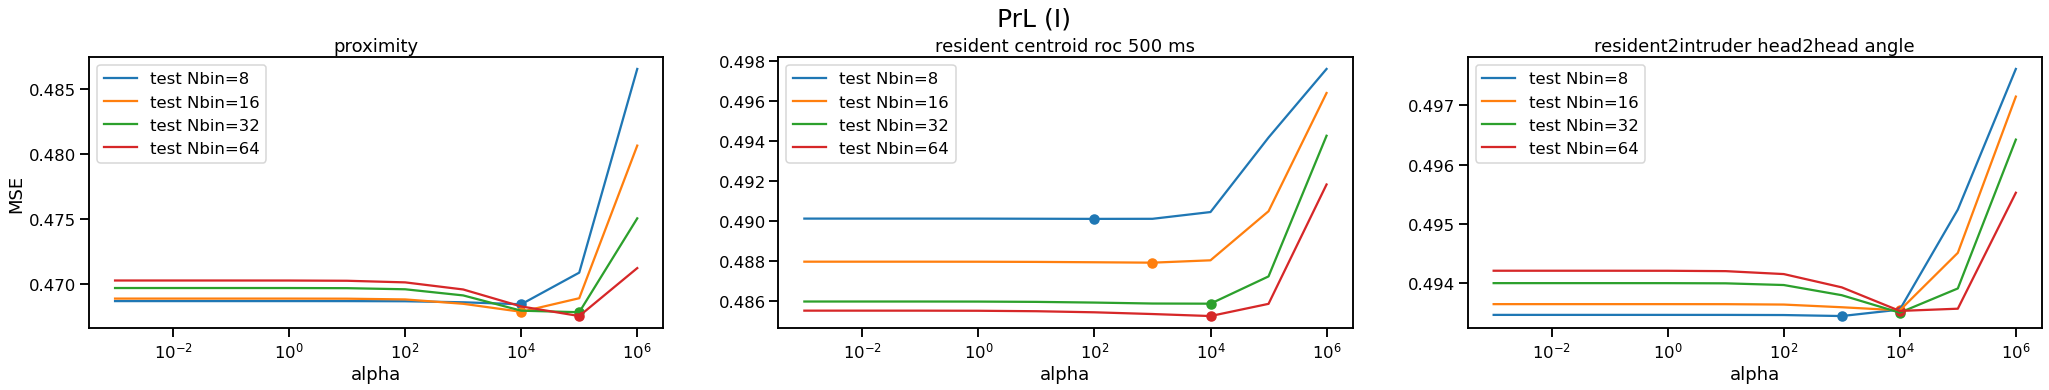

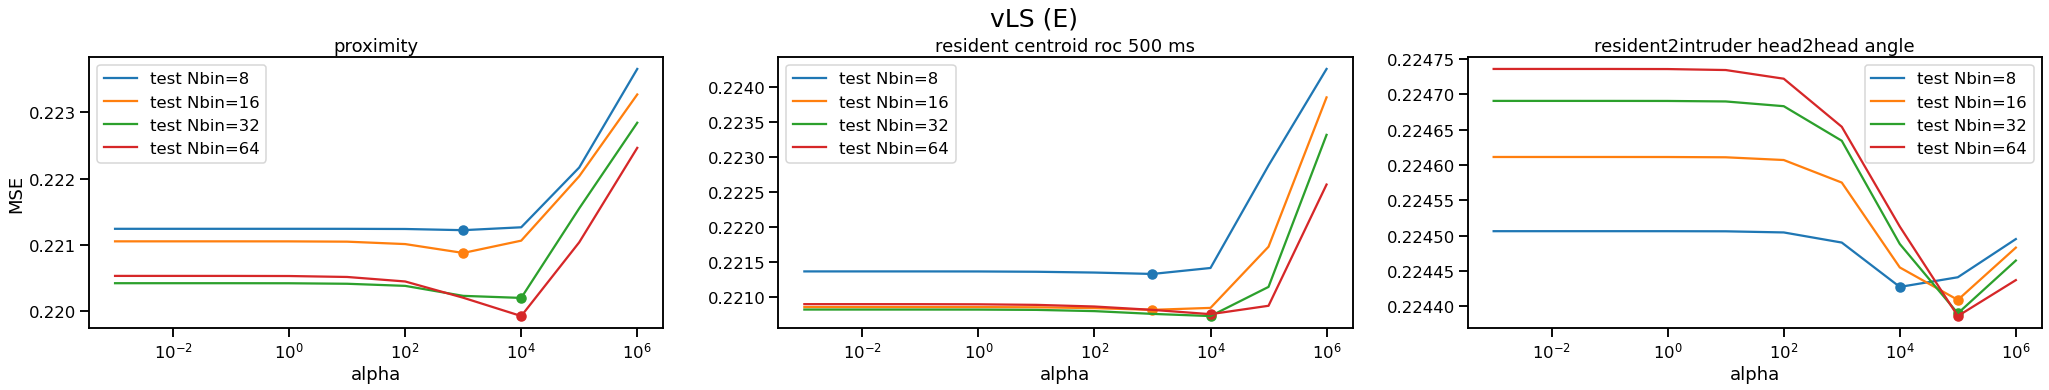

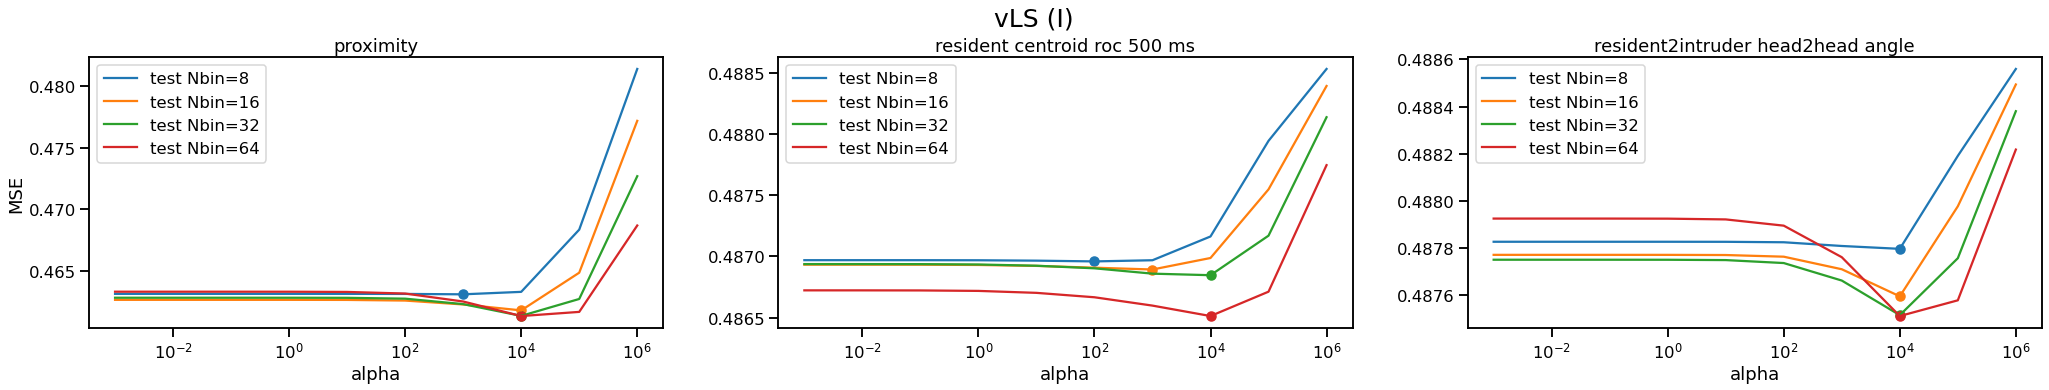

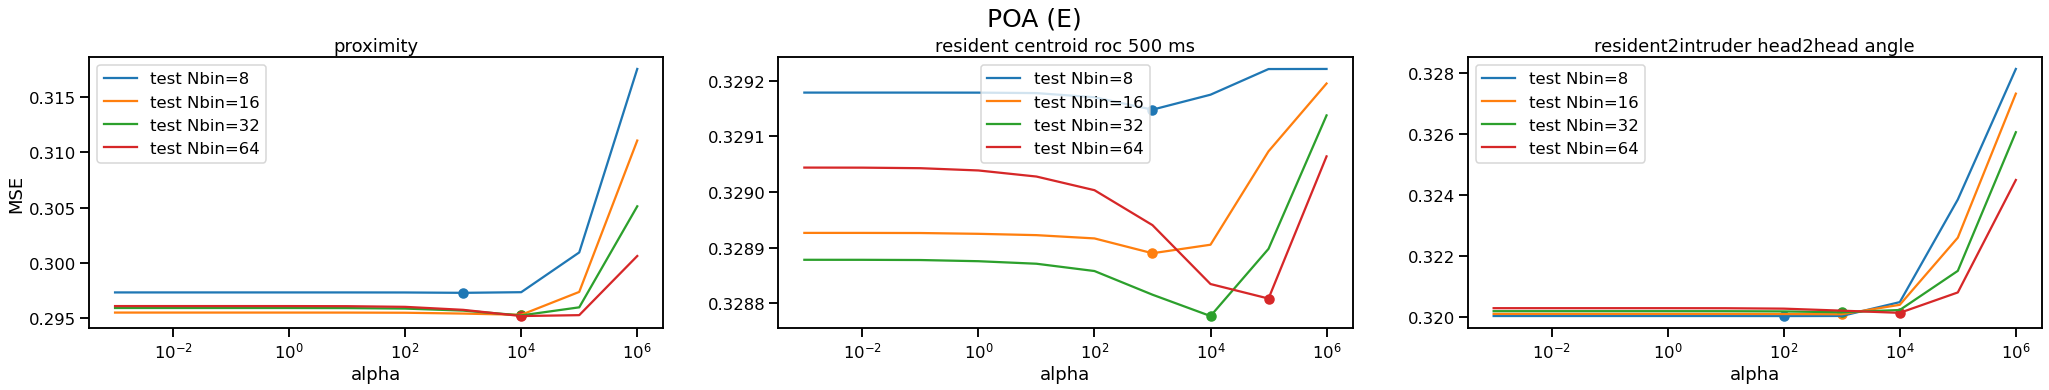

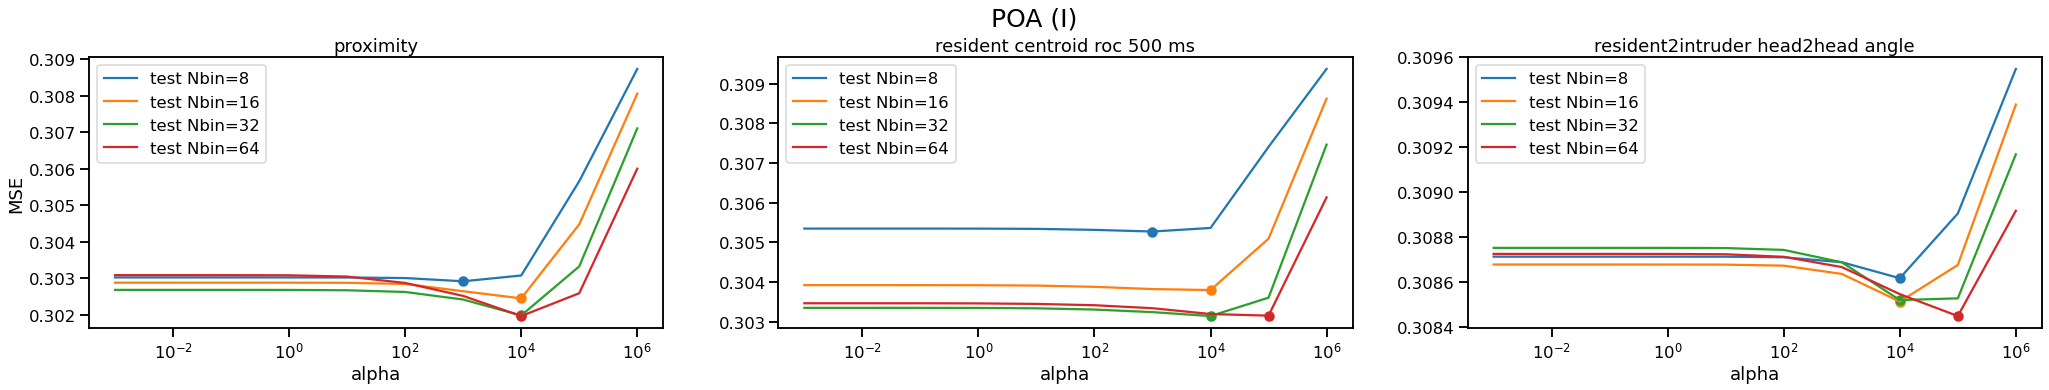

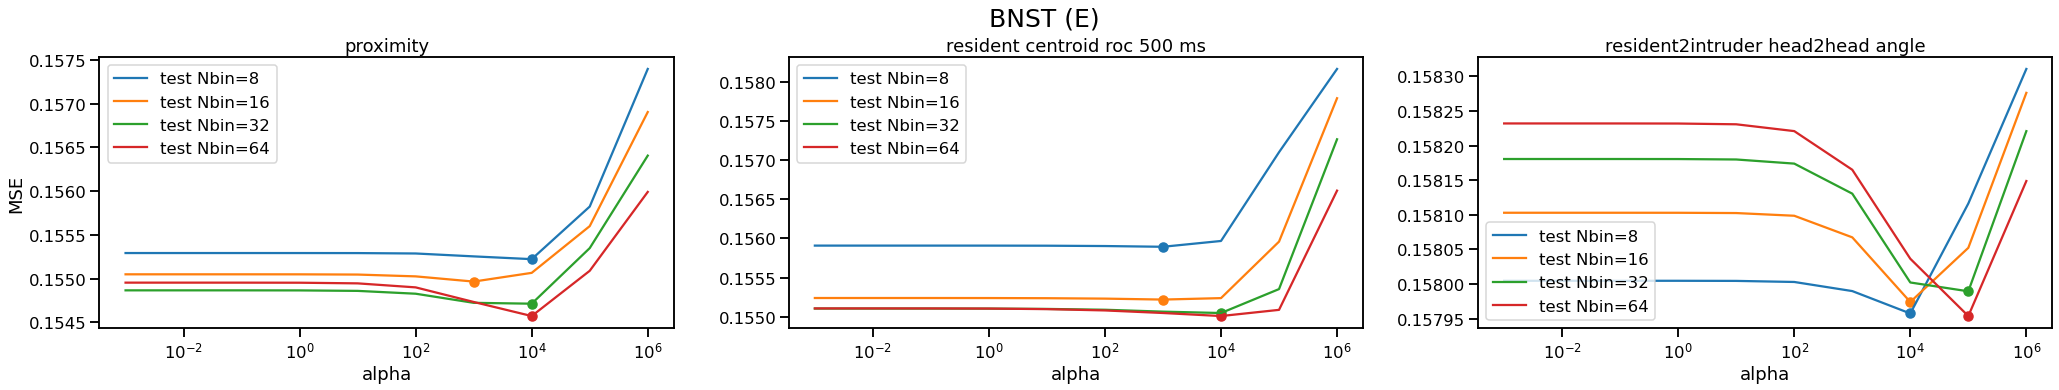

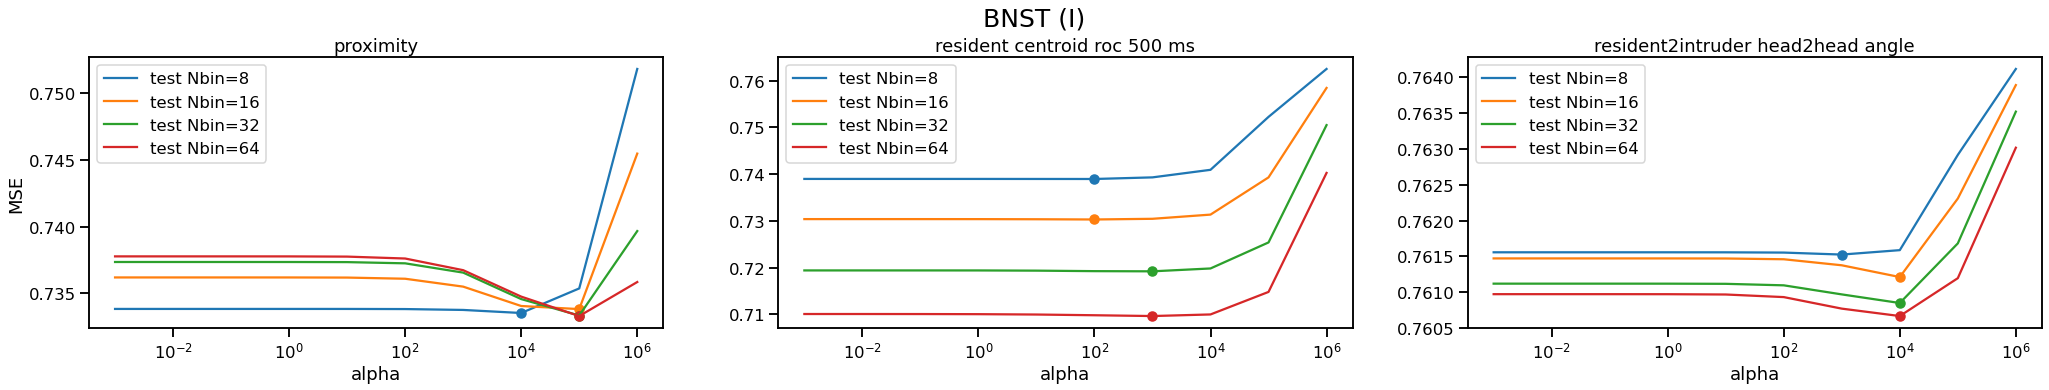

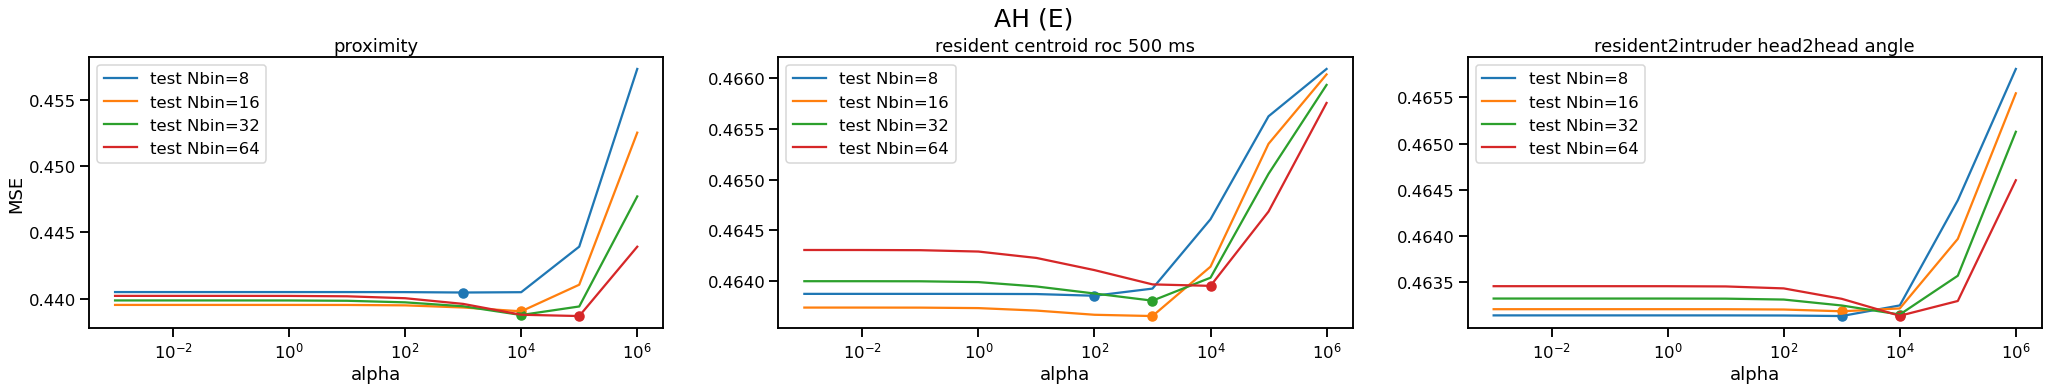

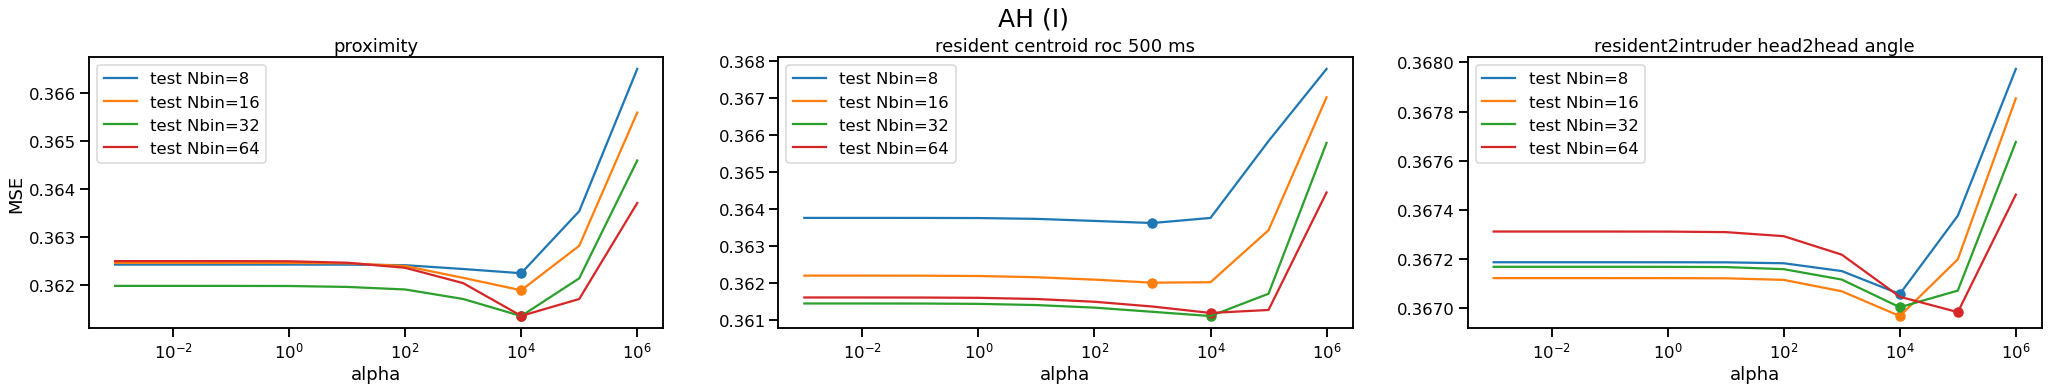

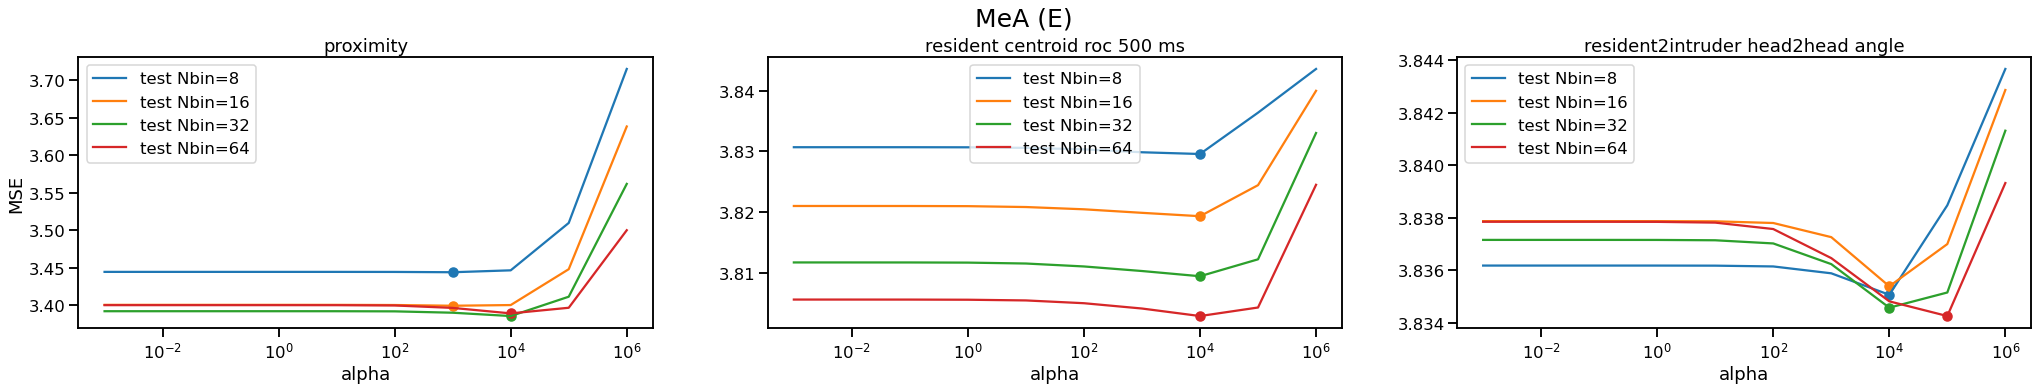

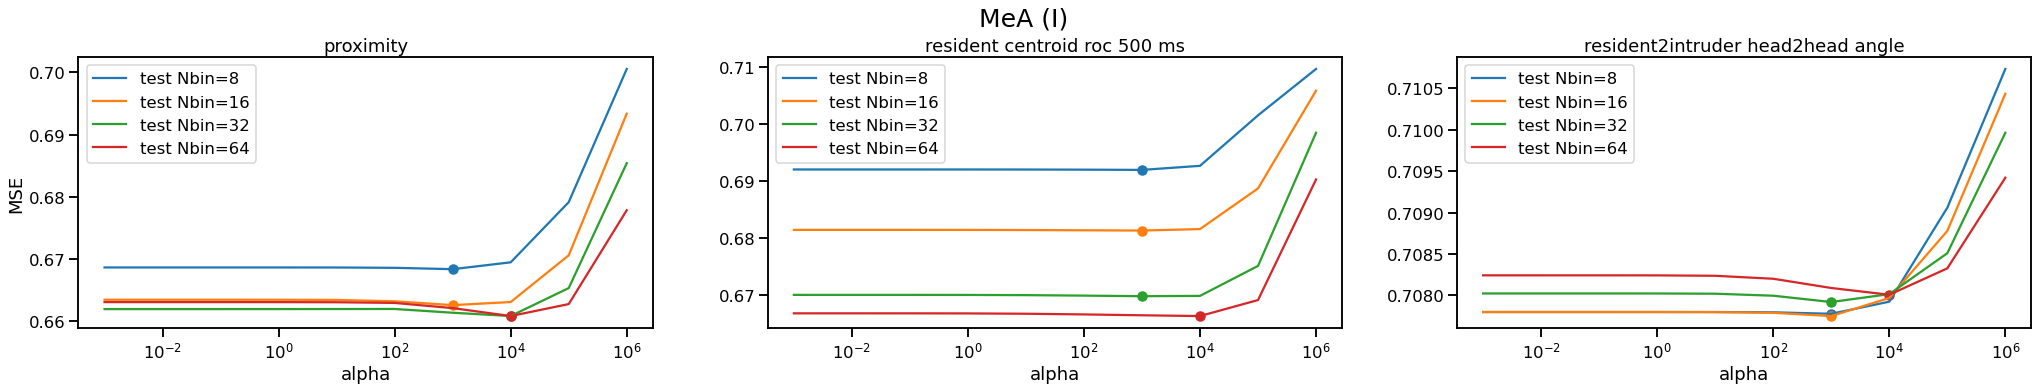

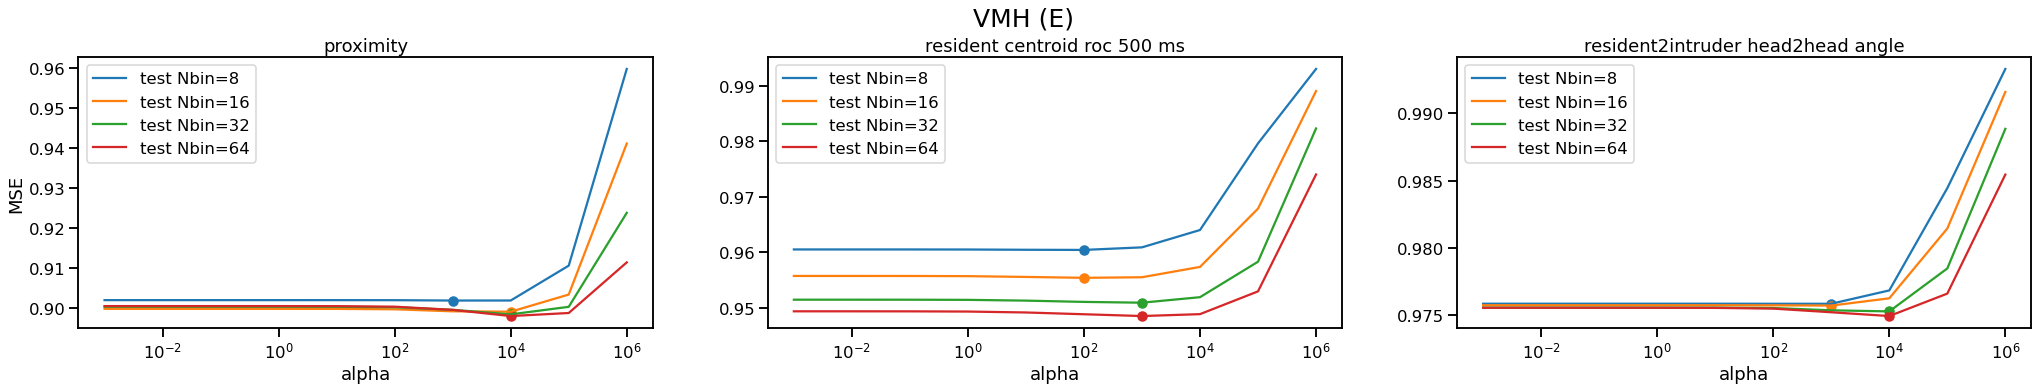

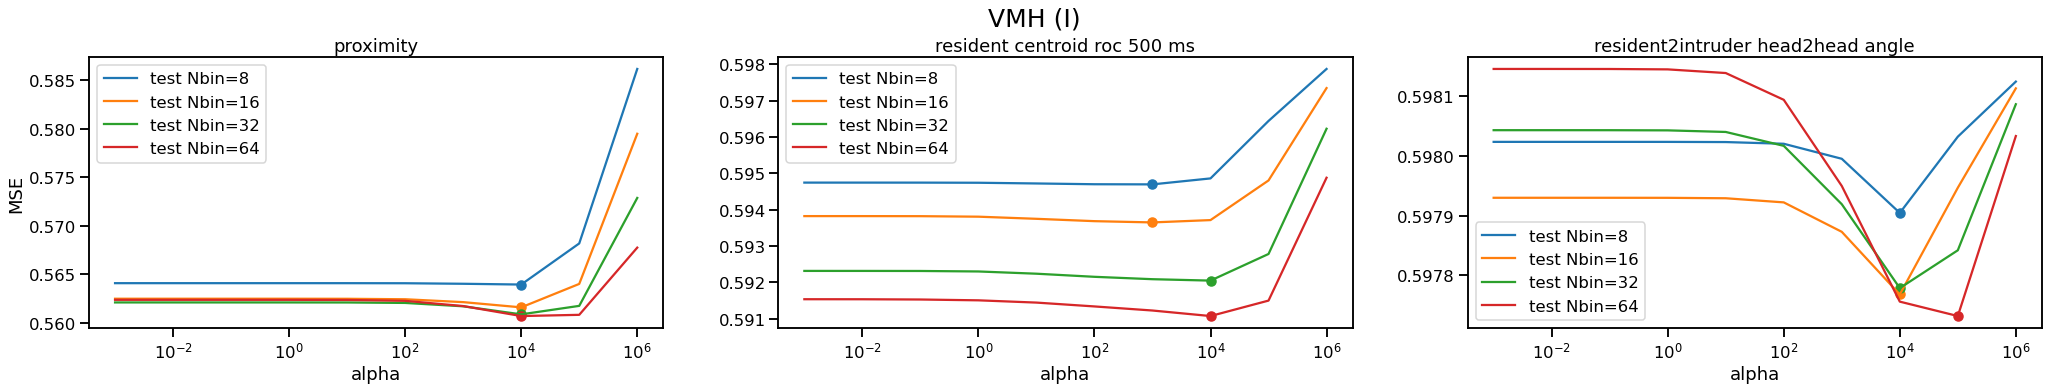

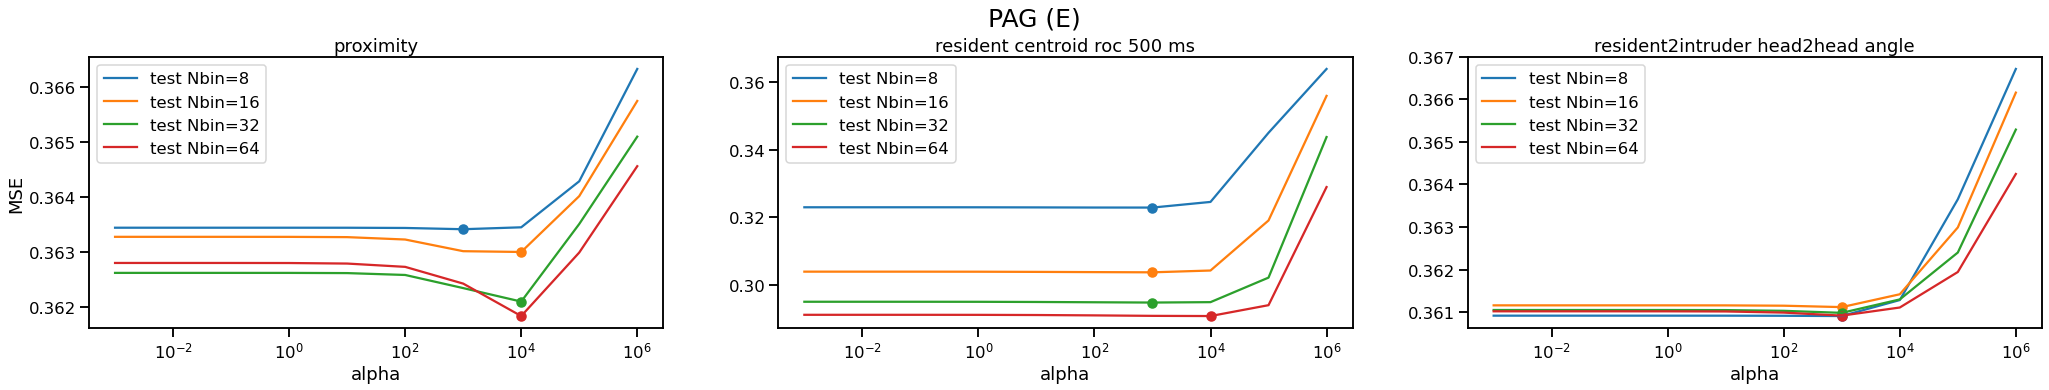

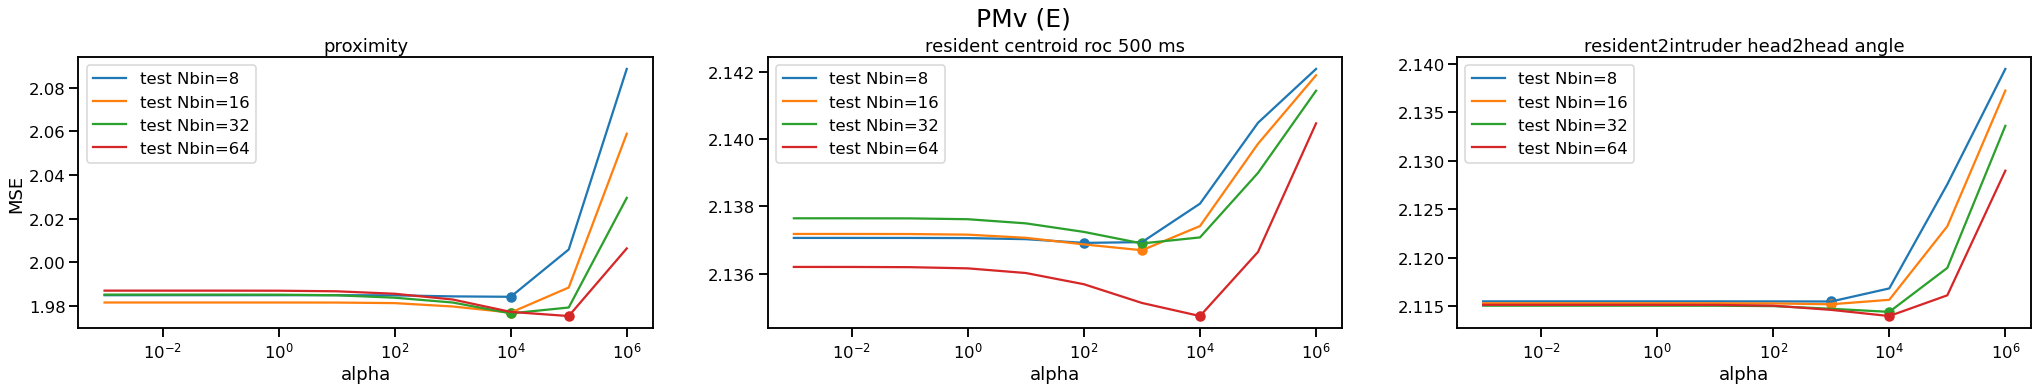

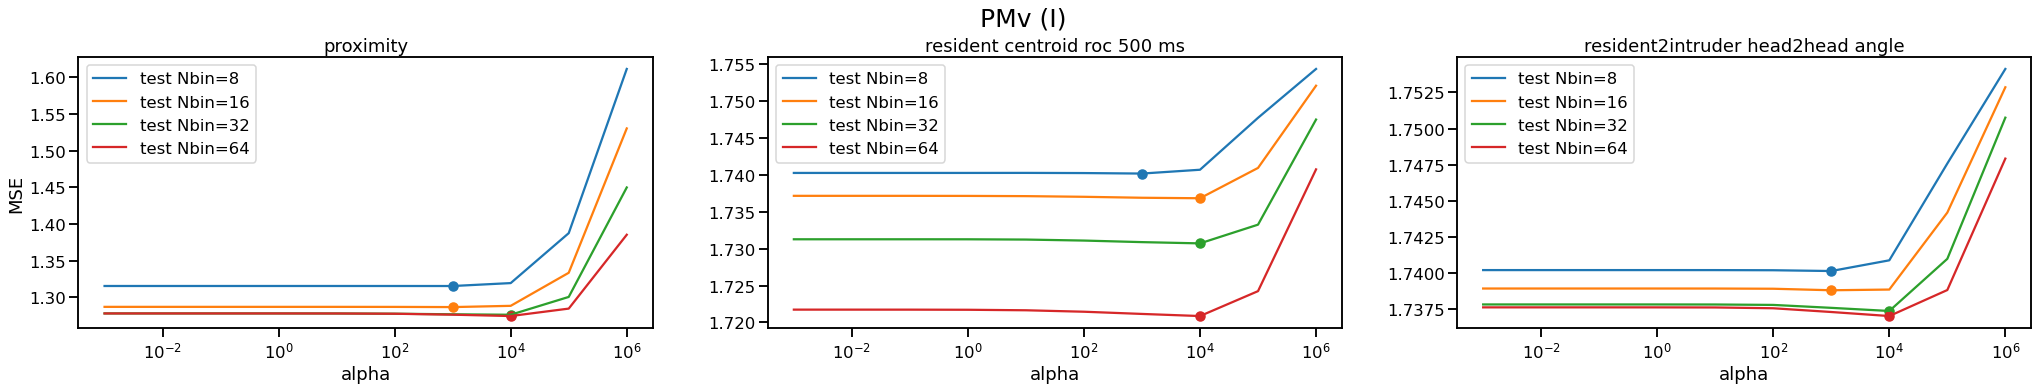

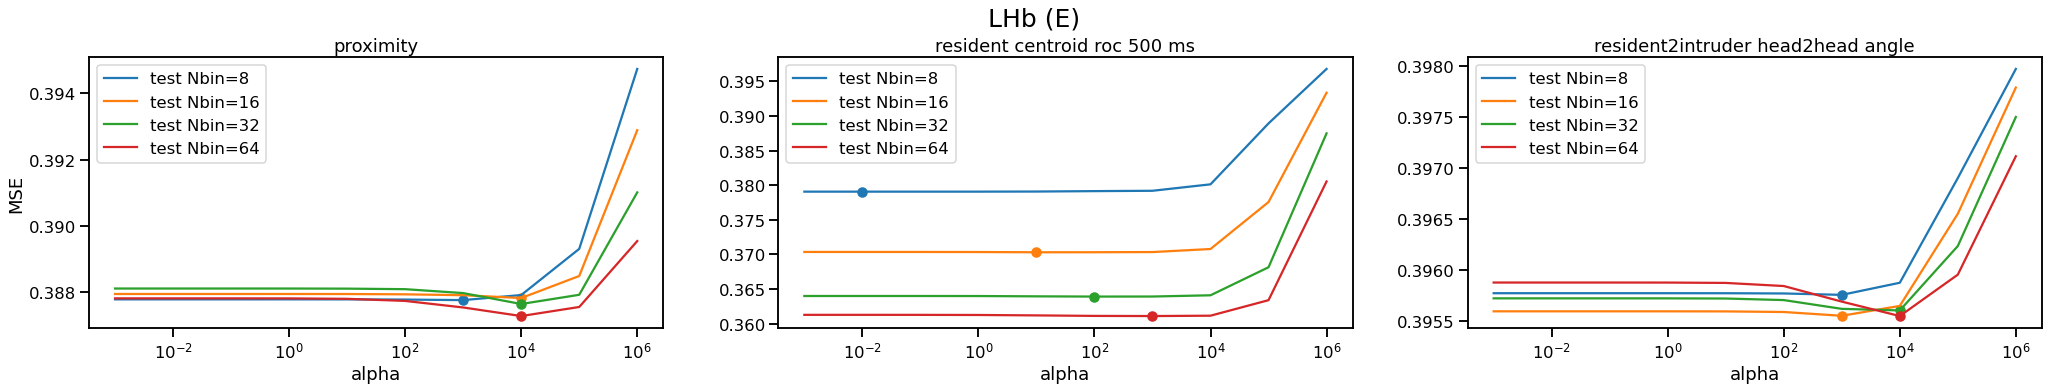

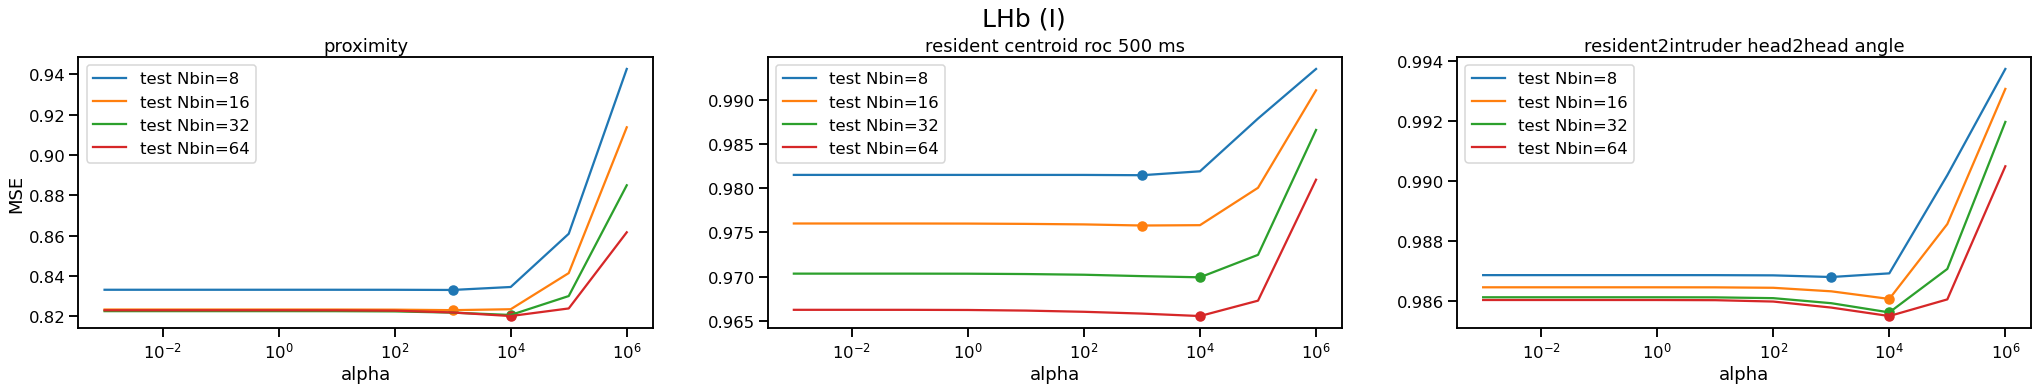

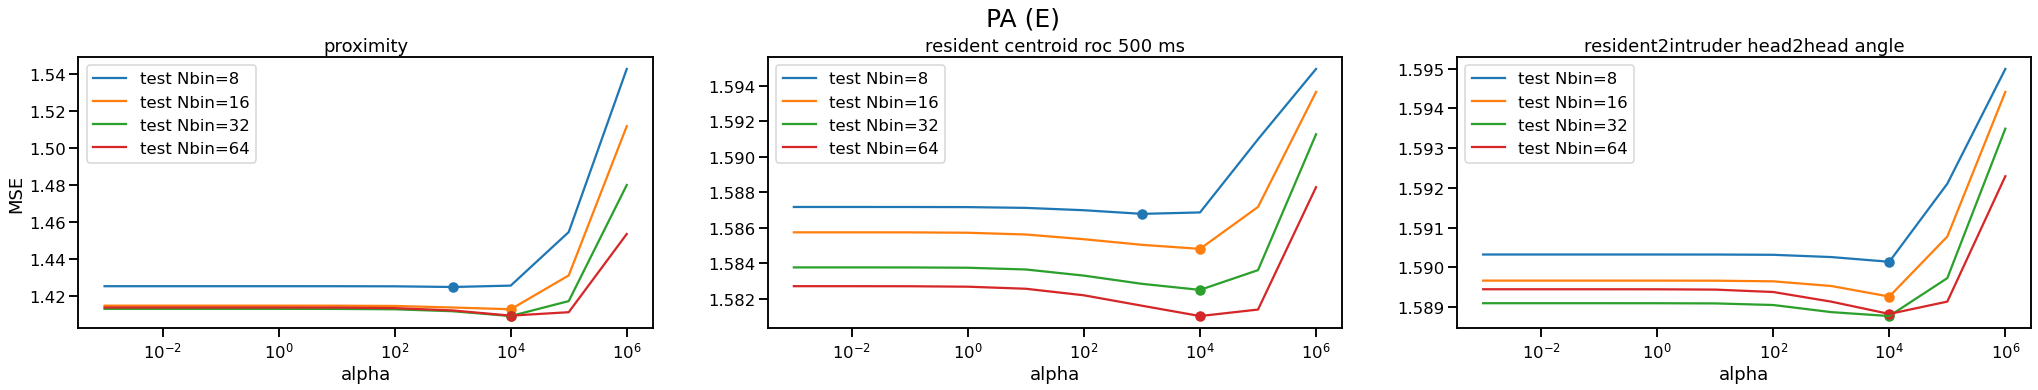

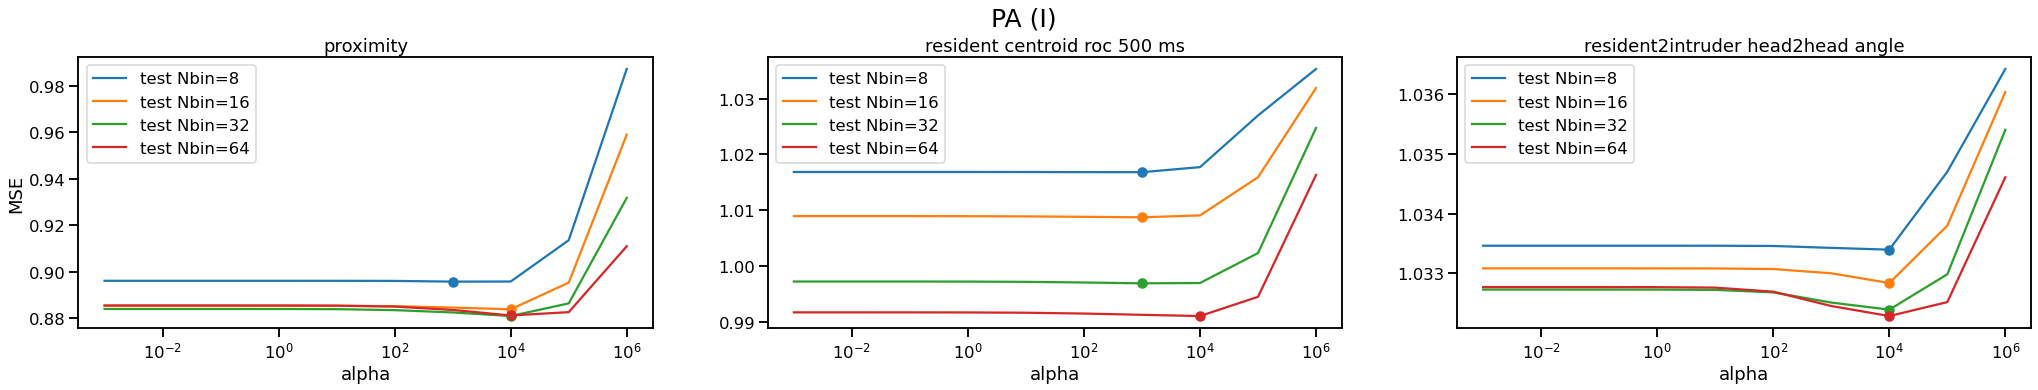

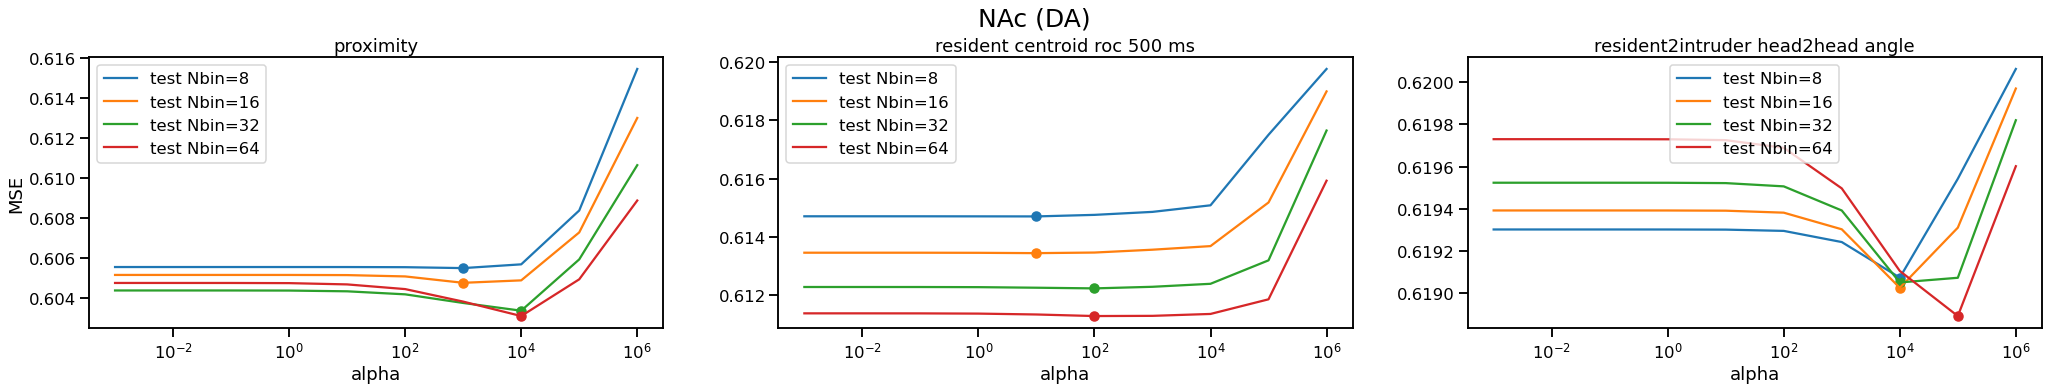

In [28]:
# MSE among cluster fits for particular animal
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-3,7)] 
Nbin_values = [2**x for x in range(3,7)]
K = 5

for region in regions:
    fits = np.load(f'../data/{animal}/{animal}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']


    fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(35,5))
    axes[0].set_ylabel('MSE')

    for feature_ind in range(len(featuresInterest_index)): #range(len(featuresShortlist)):

        for Nbin_ind in range(len(Nbin_values)):

            train_mse_mean = np.mean(train_mse[featuresInterest_index[feature_ind], :, Nbin_ind, :], axis=0)
            test_mse_mean = np.mean(test_mse[featuresInterest_index[feature_ind], :, Nbin_ind, :], axis=0)
            best_ind = np.argmin(test_mse_mean)
            

            axes[feature_ind].scatter(alpha_values[best_ind], test_mse_mean[best_ind], color=colormap[Nbin_ind])
            axes[feature_ind].plot(alpha_values, test_mse_mean, label=f'test Nbin={Nbin_values[Nbin_ind]}', color=colormap[Nbin_ind])
            # axes[feature_ind].plot(alpha_values, train_mse_mean,  linestyle='dashed')
            axes[feature_ind].set_xlabel('alpha')
            axes[feature_ind].set_xscale('log')
            axes[feature_ind].legend()
            axes[feature_ind].set_title(featuresShortlist[featuresInterest_index[feature_ind]]) 

    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()

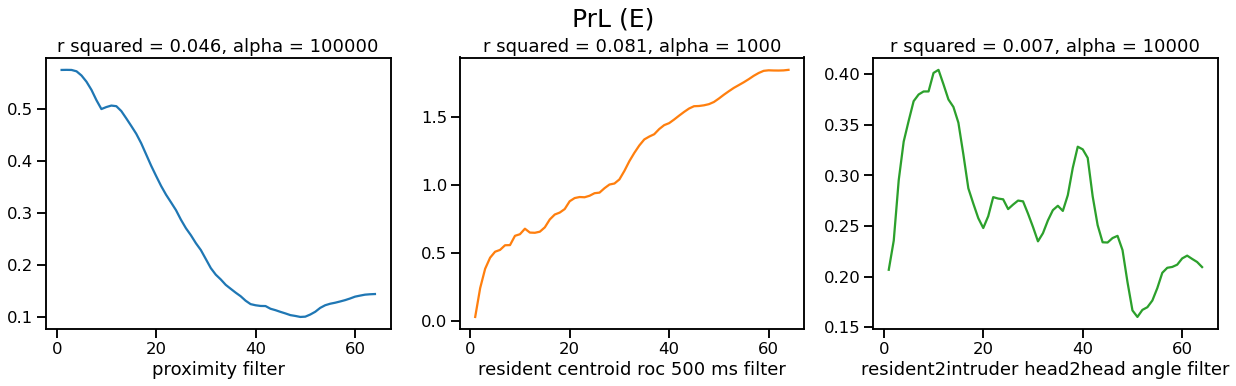

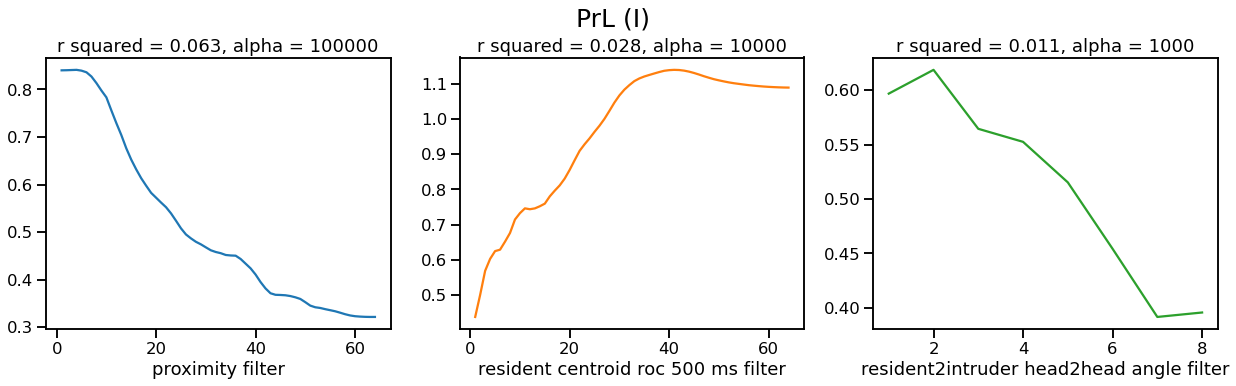

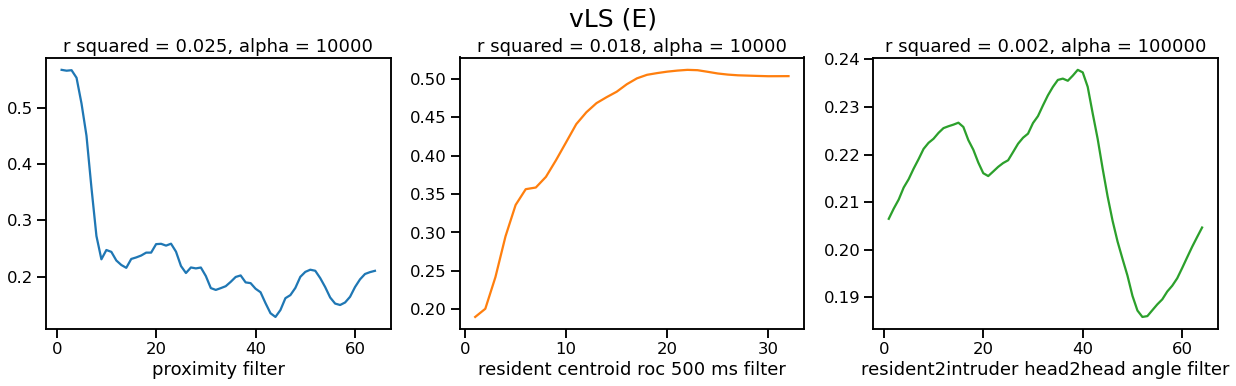

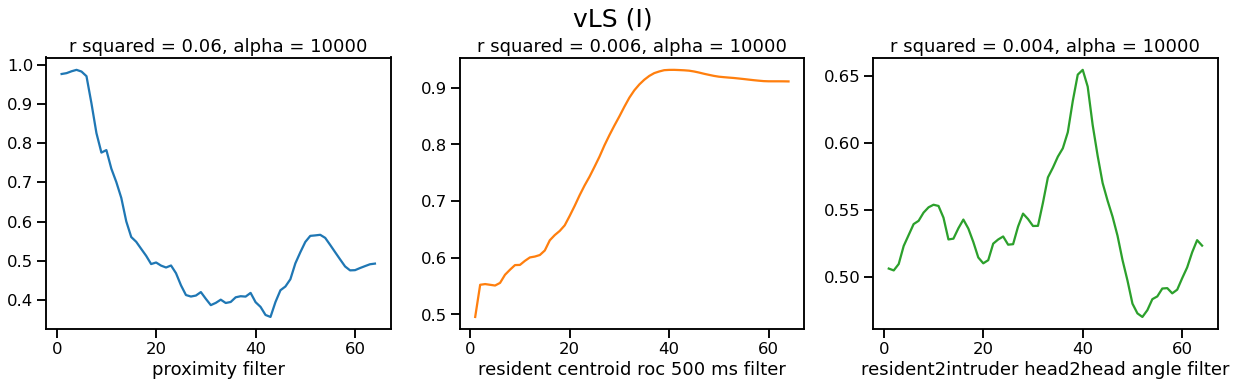

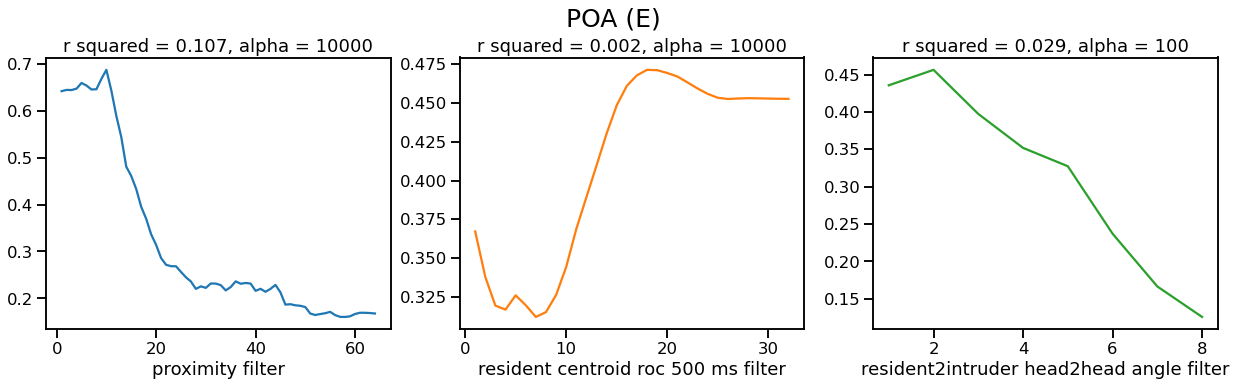

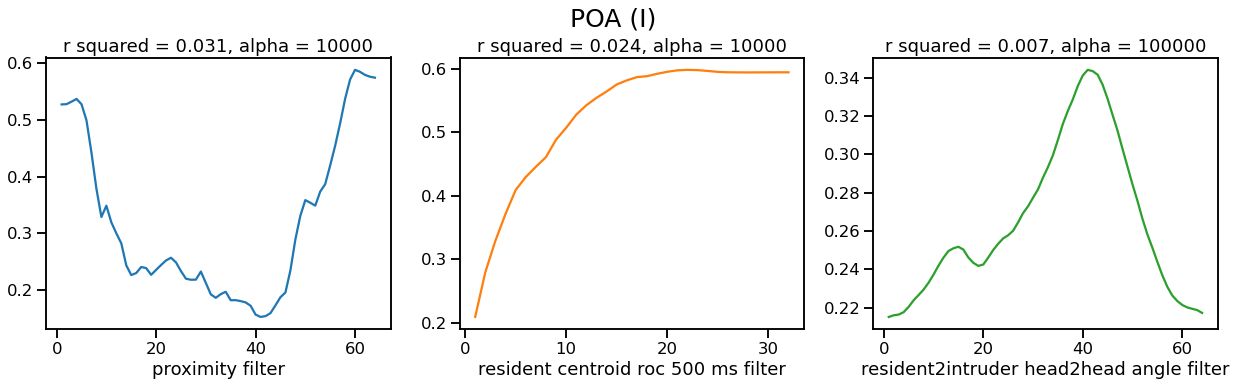

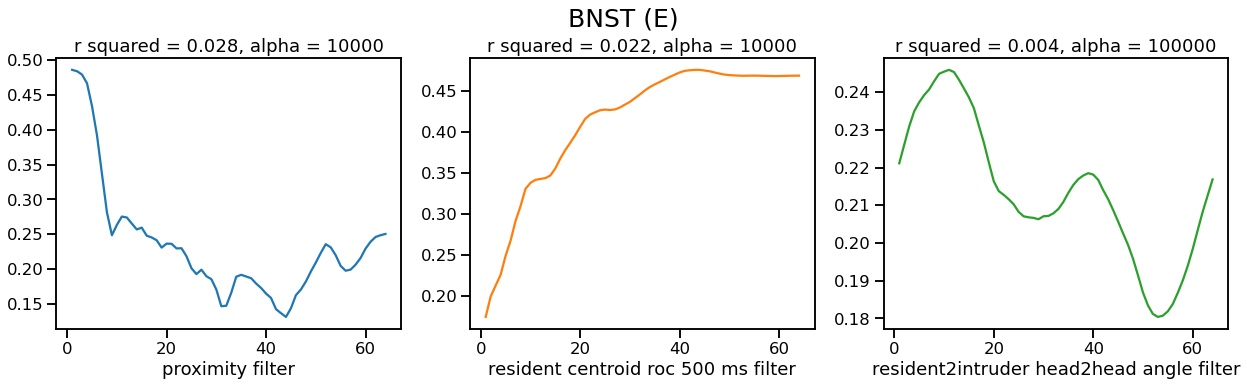

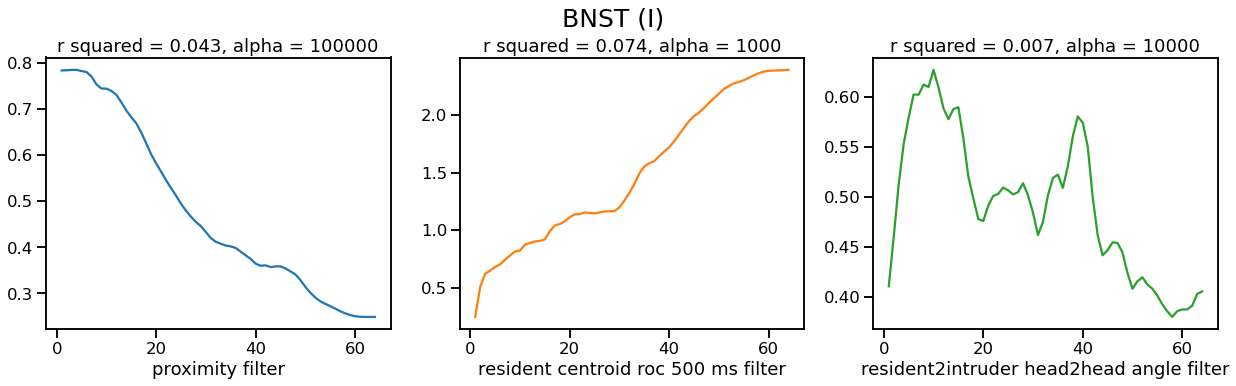

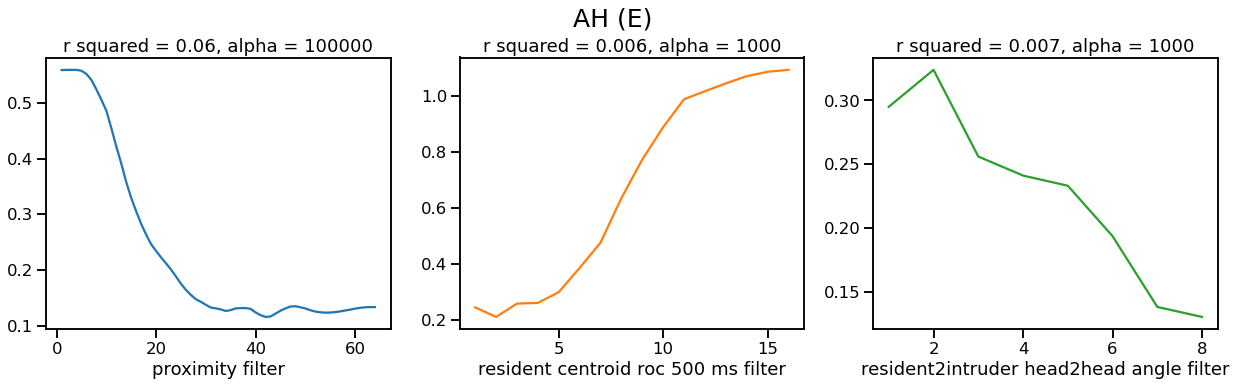

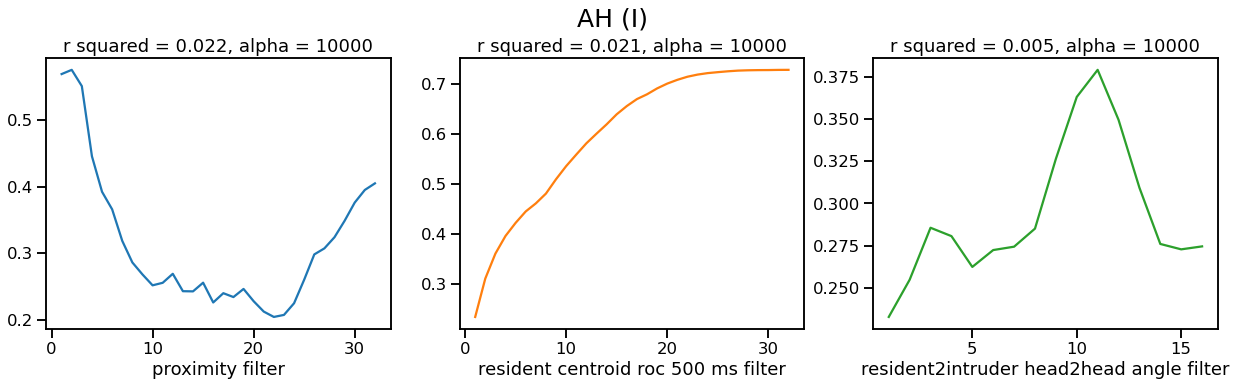

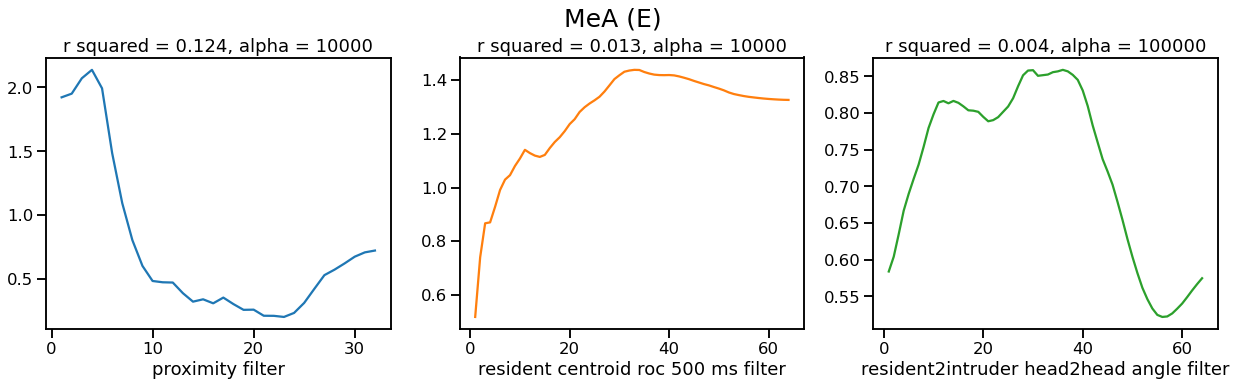

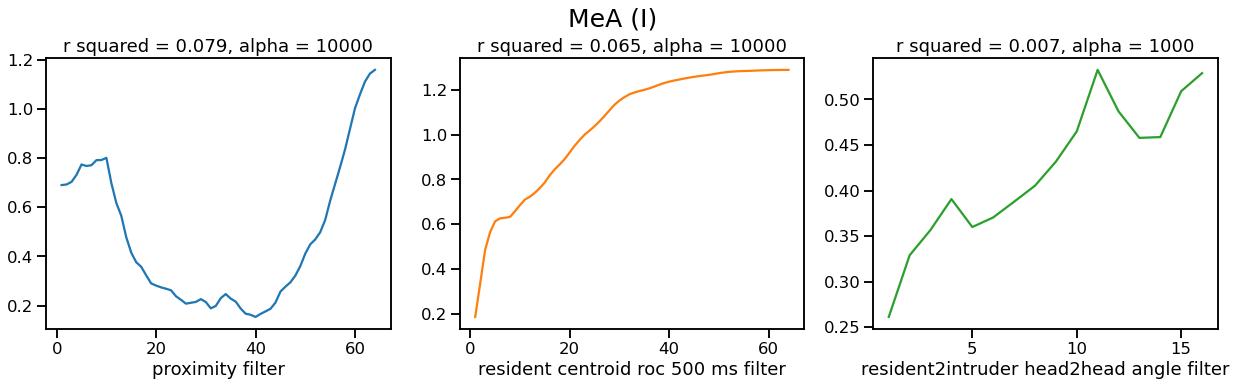

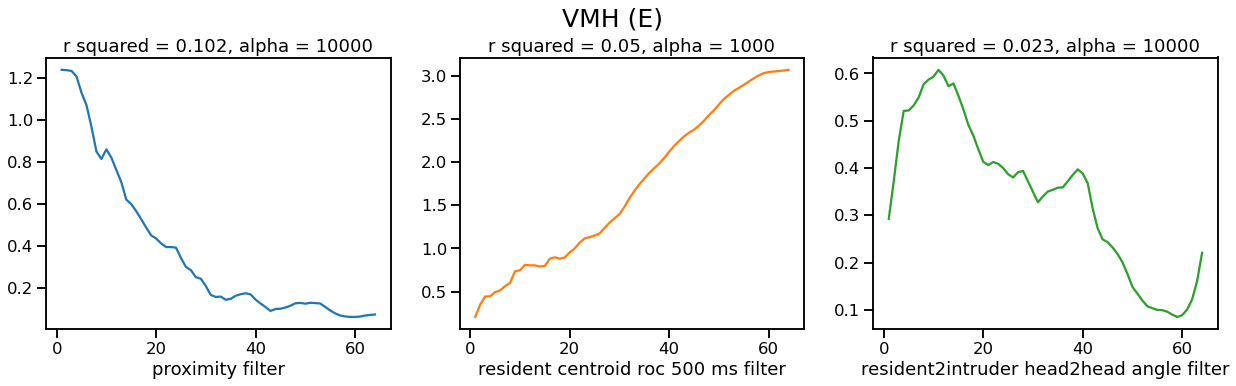

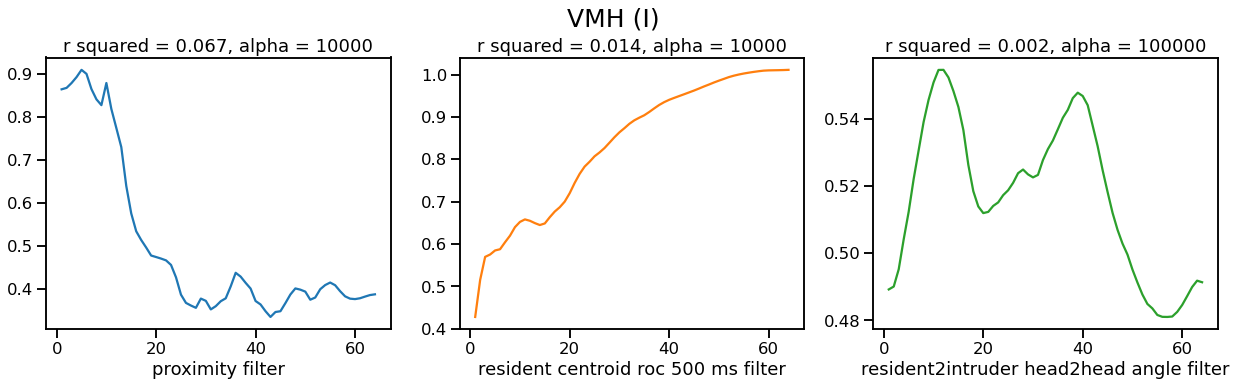

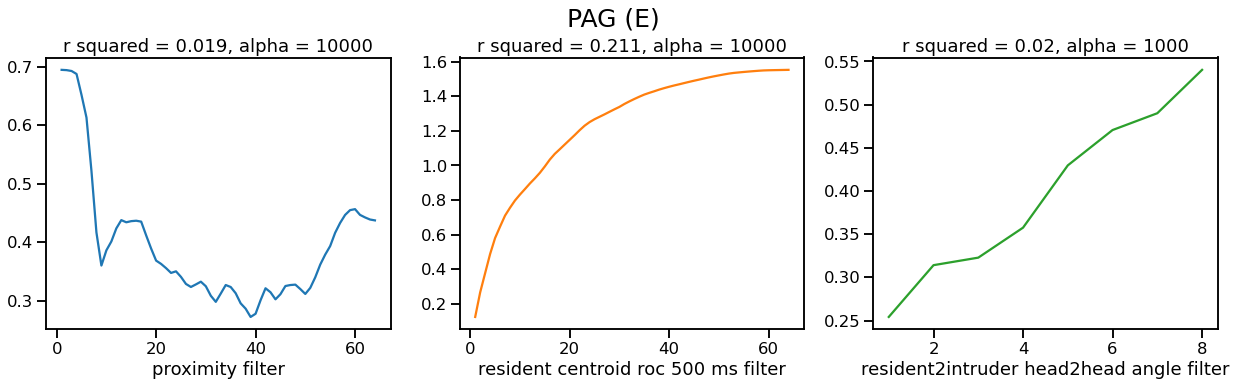

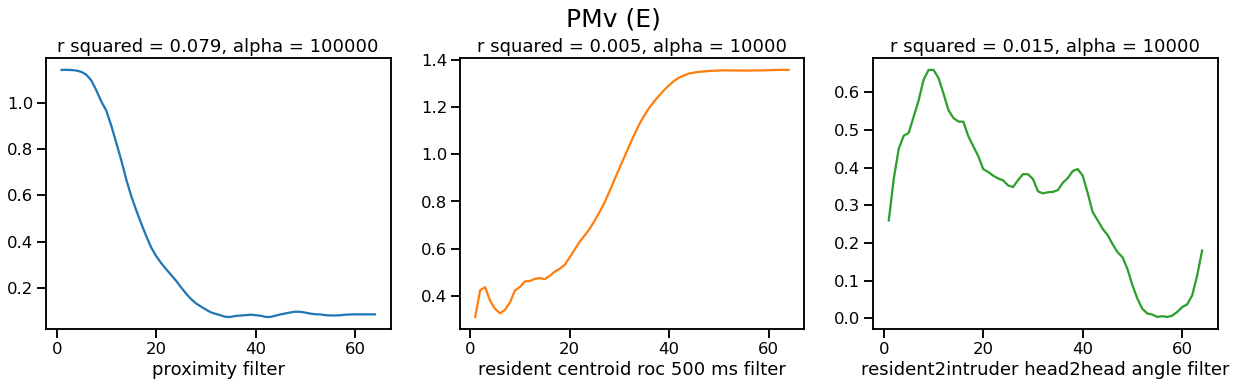

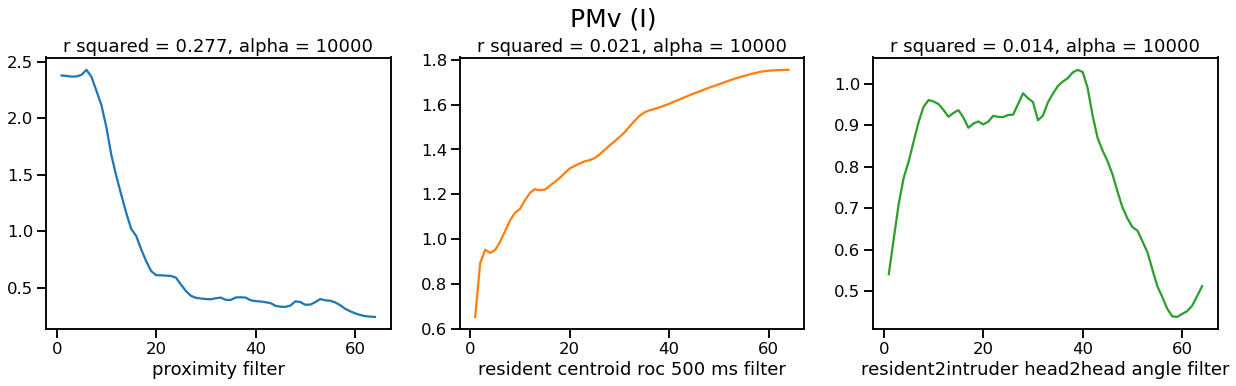

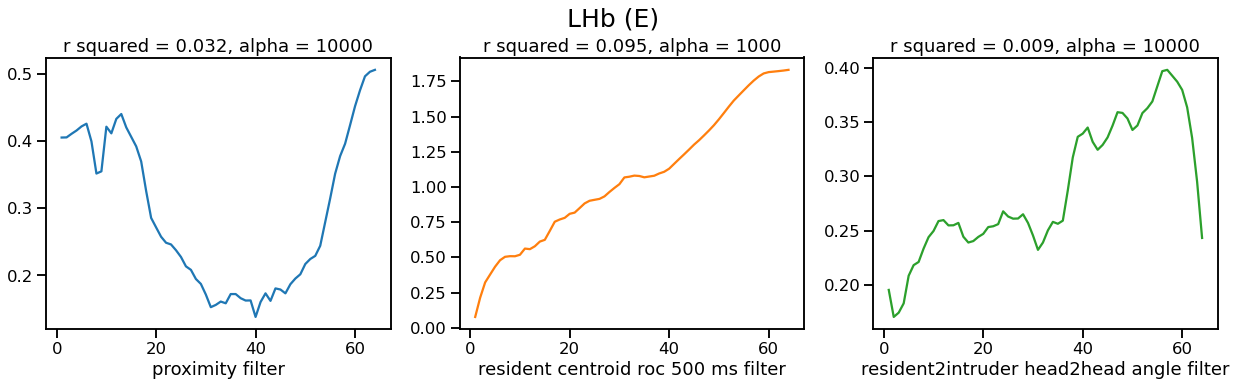

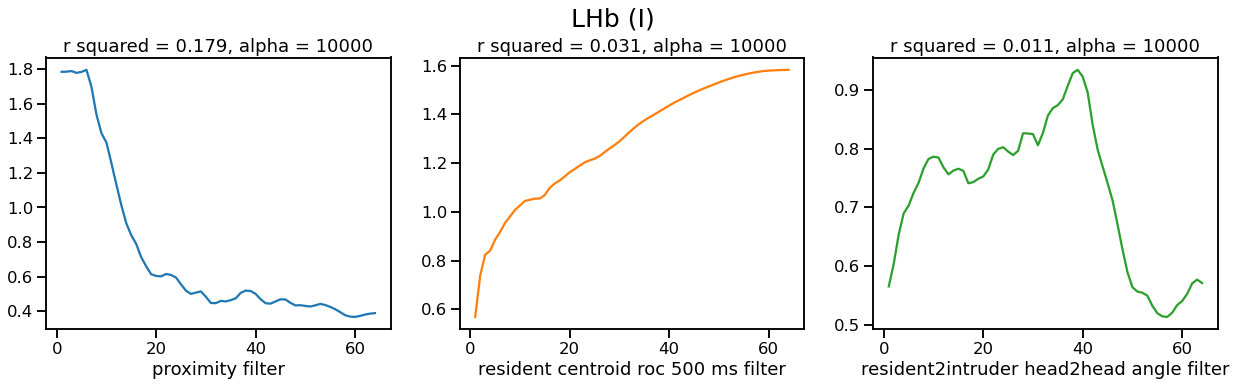

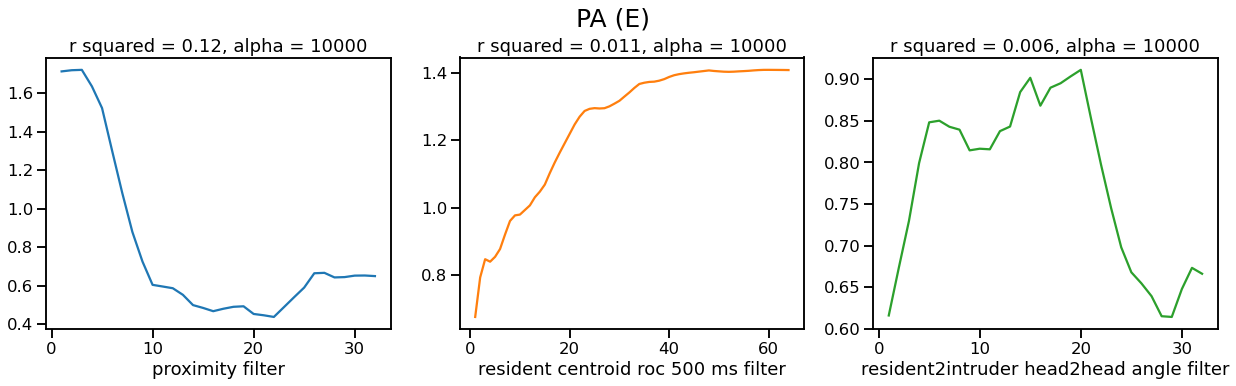

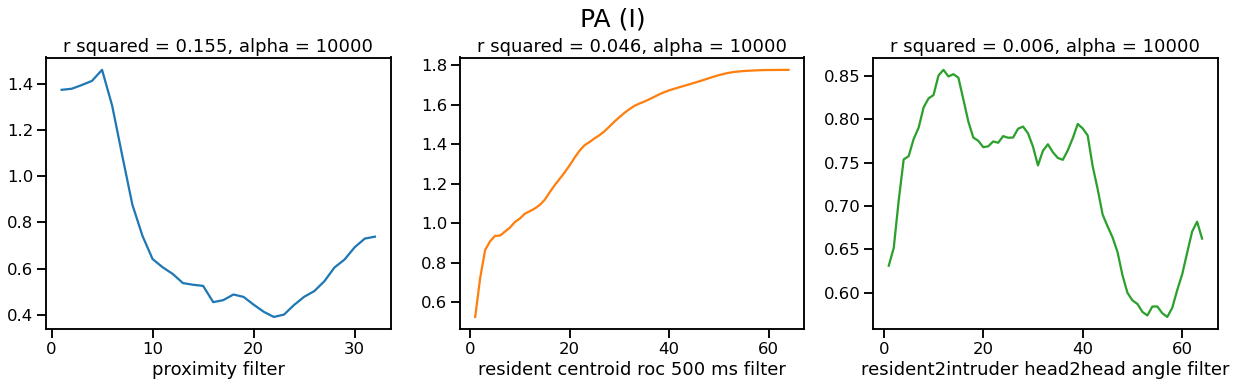

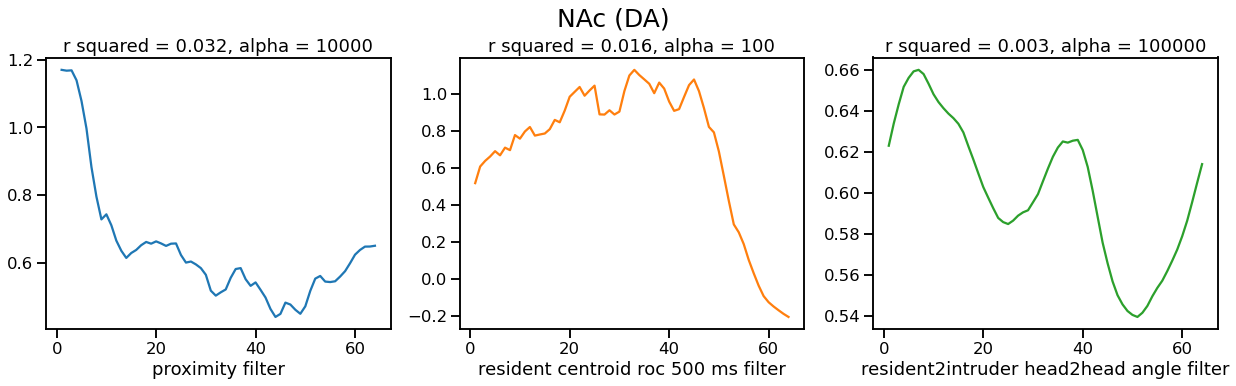

In [52]:
# MSE among cluster fits for particular animal
animal = '29L'
df = load_and_wrangle(animal)
regions = get_regions_dataframe(df)

alpha_values = [10**x for x in range(-3,7)] 
Nbin_values = [2**x for x in range(3,7)]
K = 5

for region in regions:
    fits = np.load(f'../data/{animal}/{animal}_KFold={K}_MAP-estimation_region={region}.npz', allow_pickle=True)
    W_map = fits['W_map']
    train_mse = fits['train_mse']
    test_mse = fits['test_mse']

    Y_all, _ = get_output_Y_GLM(animal, region, path=None)

    fig, axes = plt.subplots(nrows=1,ncols=len(featuresInterest_index), figsize=(len(featuresInterest_index)*7,5))
    
    for feature_ind in range(len(featuresInterest_index)): #range(len(featuresShortlist)):

        test_mse_mean = np.mean(test_mse[featuresInterest_index[feature_ind], :, :, :], axis=0)
        best_ind = np.unravel_index(np.argmin(test_mse_mean), test_mse_mean.shape)
        W_map_mean = np.mean(W_map[featuresInterest_index[feature_ind], :, best_ind[0], best_ind[1]], axis=0)

        X_all, _, _ = get_design_X_GLM_features(animal, features=[featuresShortlist[featuresInterest_index[feature_ind]]], Nbins=Nbin_values[best_ind[0]], path=None)


        r2 = compute_r_squared(X_all, Y_all, W_map_mean)

        axes[feature_ind].plot(range(1,W_map_mean.shape[0]), W_map_mean[1:], color=colormap[feature_ind]) # without bias
        # axes[feature_ind].scatter(0, W_map_mean[0], color=colormap[feature_ind])
        axes[feature_ind].set_xlabel(featuresShortlist[featuresInterest_index[feature_ind]] + ' filter')
        axes[feature_ind].set_title(f'r squared = ' + str(np.round(r2, 3)) + f', alpha = {alpha_values[best_ind[1]]}')

    fig.suptitle(str(region), size=25, y=1.02)
    plt.show()


In [41]:
from sklearn.metrics import r2_score
def compute_r_squared(X_true, Y_true, W_map):
    Y_pred = X_true @ W_map
    return r2_score(Y_true, Y_pred)

### Soft-plus Gaussian GLM

[0.62245273 0.78907392]


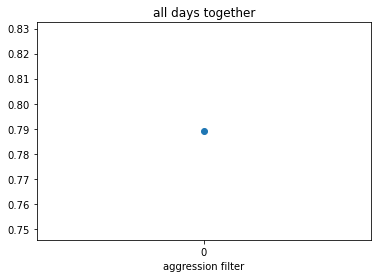

In [79]:
# Linear Gaussian GLM model 
def neglog_GLM_soft_plus_Gaussian(w, sigma, X, Y):
    f_X = np.log(1+np.exp(X @ w))
    negLl = X.shape[0]/2 * np.log(2*np.pi*sigma**2) + 1/(2*sigma**2) * np.linalg.norm(f_X-Y) ** 2
    return negLl
w_hat = scipy.optimize.minimize(neglog_GLM_soft_plus_Gaussian, w_MLE, args=(1, X_all, Y_all))['x']
print(w_hat)
plt.scatter(range(lag_minus + lag_plus ), w_hat[1:])
plt.xticks(range(lag_minus + lag_plus),range(-lag_minus,lag_plus))
plt.xlabel('aggression filter')
plt.title('all days together')
plt.show()